### Generating weekly statistics (mean, median, mode) for number of cases and deaths across New Jersey.

In [2]:
import pandas as pd

# Load COVID-19 Super Dataframe
united_states_data = pd.read_csv('final_merged_data.csv')

# Use only data from New Jersey
nj_data = united_states_data[united_states_data['State'] == 'NJ']

# print first rows of data
nj_data.head()

,countyFIPS,County Name,State,StateFIPS_cases,2020-01-22_cases,2020-01-23_cases,2020-01-24_cases,2020-01-25_cases,2020-01-26_cases,2020-01-27_cases,...,2023-07-15_deaths,2023-07-16_deaths,2023-07-17_deaths,2023-07-18_deaths,2023-07-19_deaths,2023-07-20_deaths,2023-07-21_deaths,2023-07-22_deaths,2023-07-23_deaths,population
1774,34001,Atlantic County,NJ,34,0,0,0,0,0,0,...,1073,1073,1073,1073,1073,1073,1073,1073,1073,263670
1775,34003,Bergen County,NJ,34,0,0,0,0,0,0,...,3708,3708,3708,3708,3708,3708,3708,3708,3708,932202
1776,34005,Burlington County,NJ,34,0,0,0,0,0,0,...,1364,1364,1364,1364,1364,1364,1364,1364,1364,445349
1777,34007,Camden County,NJ,34,0,0,0,0,0,0,...,1959,1959,1959,1959,1959,1959,1959,1959,1959,506471
1778,34009,Cape May County,NJ,34,0,0,0,0,0,0,...,332,332,332,332,332,332,332,332,332,92039


In [4]:
# specifiying the range of dates of 2020.6.1(Monday) - 2021.1.3(Sunday)
start_date = '2020-06-01'
end_date = '2021-01-03'

# filtering columns that contain case data (ending with '_cases')
nj_cases = [col for col in nj_data.columns if '_cases' in col]

# filtering columns that contain case data (ending with '_deaths')
nj_deaths = [col for col in nj_data.columns if '_deaths' in col]

# filtering case columns
filtered_nj_cases = ['County Name', 'State', 'population'] + [col for col in nj_cases if start_date <= col.split('_')[0] <= end_date]
filtered_nj_cases = nj_data[filtered_nj_cases]

# filtering death columns
filtered_nj_deaths = ['County Name', 'State', 'population'] + [col for col in nj_deaths if start_date <= col.split('_')[0] <= end_date]
filtered_nj_deaths = nj_data[filtered_nj_deaths]

# melting for cases
data_nj_cases = filtered_nj_cases.melt(
    id_vars=['County Name', 'State', 'population'],
    var_name='date',
    value_name='cases')

# melting for deaths
data_nj_deaths = filtered_nj_deaths.melt(
    id_vars=['County Name', 'State', 'population'],
    var_name='date',
    value_name='deaths')

# removing the '_cases' suffix from the date and convert the 'date' column to datetime
data_nj_cases['date'] = pd.to_datetime(data_nj_cases['date'].str.replace('_cases',''), format='%Y-%m-%d')

# removing the '_deaths' suffix from the date and convert the 'date' column to datetime
data_nj_deaths['date'] = pd.to_datetime(data_nj_deaths['date'].str.replace('_deaths',''), format='%Y-%m-%d')

# grouping by 'State' and 'date' & calculate weekly sums
weekly_nj_cases = data_nj_cases.groupby(['State', 'date']).sum().reset_index()
# grouping by 'State' and 'date' & calculate weekly sums
weekly_nj_deaths = data_nj_deaths.groupby(['State', 'date']).sum().reset_index()

# resample the data to weekly frequency & sum cases
weekly_nj_cases = weekly_nj_cases.set_index('date').resample('W-MON').sum()

# resample the data to weekly frequency & sum cases
weekly_nj_deaths = weekly_nj_deaths.set_index('date').resample('W-MON').sum()

# normalizing by popoulation (cases per 100,000 people)
weekly_nj_cases['per_100k'] = (weekly_nj_cases['cases'] / weekly_nj_cases['population']) * 100000

# normalizing by popoulation (deaths per 100,000 people)
weekly_nj_deaths['per_100k'] = (weekly_nj_deaths['deaths'] / weekly_nj_deaths['population']) * 100000

# weekly stats for cases
weekly_mean_cases_nj = weekly_nj_cases['per_100k'].mean()
weekly_median_cases_nj = weekly_nj_cases['per_100k'].median()
weekly_mode_cases_nj = weekly_nj_cases['per_100k'].mode()[0] if not weekly_nj_cases['per_100k'].mode().empty else 0

# weekly stats for deaths
weekly_mean_deaths_nj = weekly_nj_deaths['per_100k'].mean()
weekly_median_deaths_nj = weekly_nj_deaths['per_100k'].median()
weekly_mode_deaths_nj = weekly_nj_deaths['per_100k'].mode()[0] if not weekly_nj_deaths['per_100k'].mode().empty else 0

# printing mean, median, mode for cases in New Jersey
print(f"Weekly Mean of Cases in New Jersey: {weekly_mean_cases_nj}")
print(f"Weekly Median of Cases in New Jersey: {weekly_median_cases_nj}")
print(f"Weekly Mode of Cases in New Jersey: {weekly_mode_cases_nj}")
print()

# printing mean, median, mode for deaths in New Jersey
print(f"Weekly Mean of Deaths in New Jersey: {weekly_mean_deaths_nj}")
print(f"Weekly Median of Deaths in New Jersey: {weekly_median_deaths_nj}")
print(f"Weekly Mode of Deaths in New Jersey: {weekly_mode_deaths_nj}")
print()

# print first few rows
print(weekly_nj_cases[['cases','per_100k']].head())
print(weekly_nj_deaths[['deaths','per_100k']].head())

Weekly Mean of Cases in New Jersey: 2684.0750768163725
Weekly Median of Cases in New Jersey: 2218.0035071788116
Weekly Mode of Cases in New Jersey: 1801.9767647393267

Weekly Mean of Deaths in New Jersey: 178.23243425755308
Weekly Median of Deaths in New Jersey: 180.5257808844762
Weekly Mode of Deaths in New Jersey: 131.96069888169473

              cases     per_100k
date                            
2020-06-01   160055  1801.976765
2020-06-08  1136218  1827.441849
2020-06-15  1157651  1861.913720
2020-06-22  1174115  1888.393676
2020-06-29  1188444  1911.439795
            deaths    per_100k
date                          
2020-06-01   11721  131.960699
2020-06-08   84160  135.359153
2020-06-15   87495  140.723017
2020-06-22   89735  144.325732
2020-06-29   96929  155.896237


### Plotting Weekly Trends of COIVD-19 Cases and Deaths per 100,000 People in New Jersey:

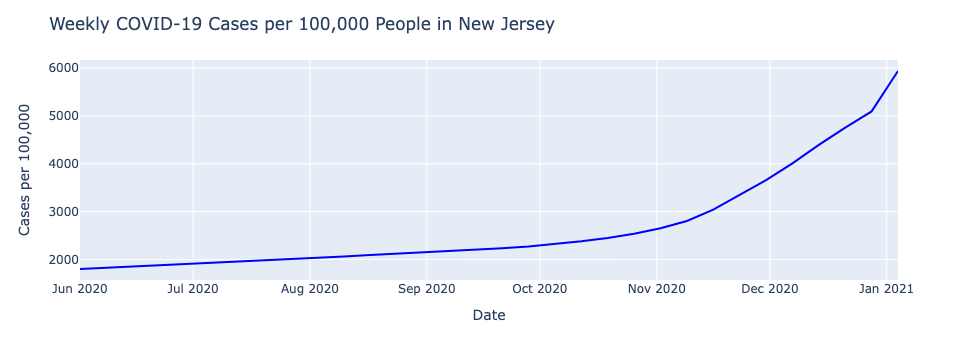

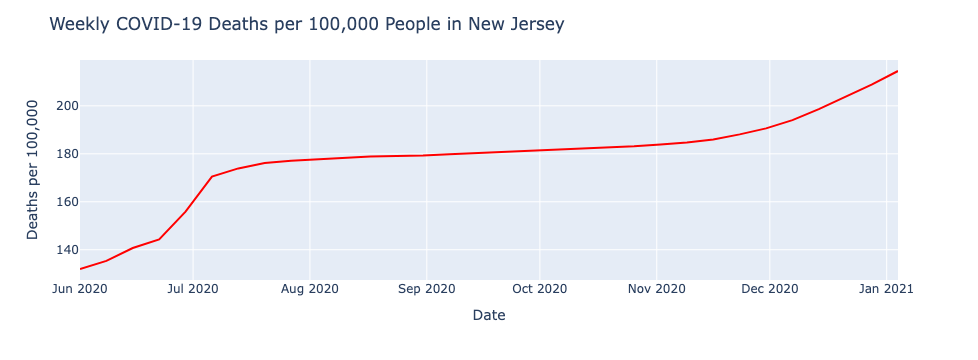

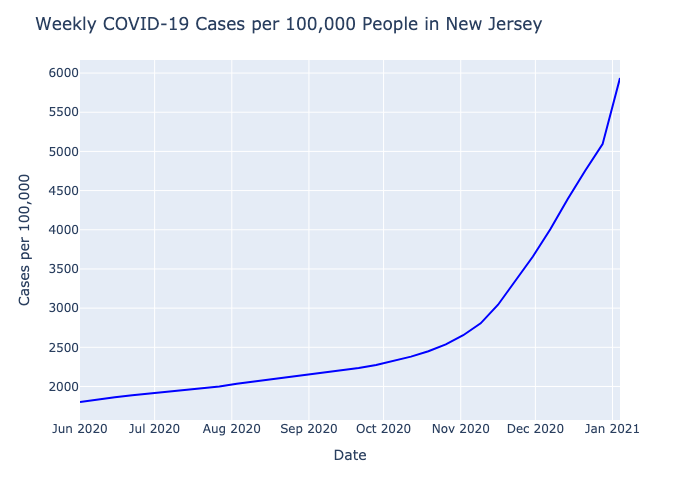

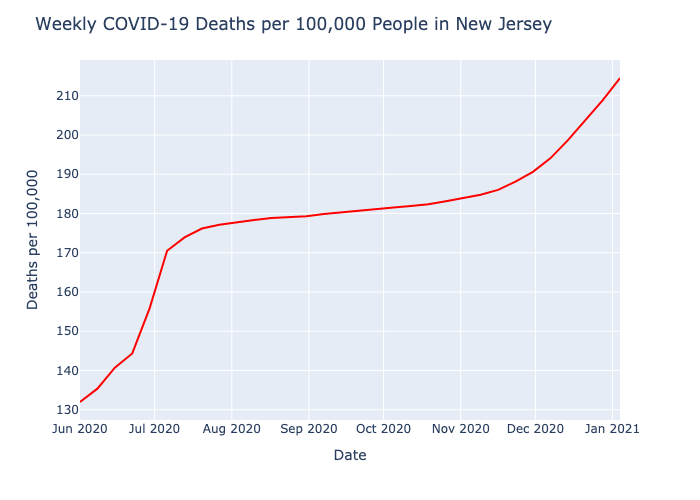

In [14]:
import plotly.express as px
import plotly.io as pio

# line plot for weekly cases per 100,000 people in New Jersey:

# initializing plot
fig_nj = px.line()
fig2_nj = px.line()

# adding case data
fig_nj.add_scatter(
        x = weekly_nj_cases.reset_index()['date'],
        y = weekly_nj_cases.reset_index()['per_100k'],
        mode = 'lines',
        name = 'Cases per 100,000',
        line = dict(color = 'blue'))  

# adding death data
fig2_nj.add_scatter(
        x = weekly_nj_deaths.reset_index()['date'],
        y = weekly_nj_deaths['per_100k'],
        mode = 'lines',
        name = 'Deaths per 100,000',
        line = dict(color = 'red'))   

# updating figure data
fig_nj.update_layout(
        title = 'Weekly COVID-19 Cases per 100,000 People in New Jersey',
        xaxis_title = 'Date',
        yaxis_title = 'Cases per 100,000',)

fig2_nj.update_layout(
        title = 'Weekly COVID-19 Deaths per 100,000 People in New Jersey',
        xaxis_title = 'Date',
        yaxis_title = 'Deaths per 100,000',)
                   
# Display and save the first figure
fig_nj.show()
pio.write_image(fig_nj, 'fig_nj.png')

# Display and save the second figure
fig2_nj.show()
pio.write_image(fig2_nj, 'fig2_nj.png')

# Display both images
from IPython.display import Image, display

display(Image('fig_nj.png'))  # display first image
display(Image('fig2_nj.png')) # display second image

### Comparing the data of New Jersey against Connecticut, Rhode Island, Massachusetts, New Hampshire, and Vermont.

### Connecticut:

In [16]:
# filtering for connecticut data
ct_data = united_states_data[united_states_data['State'] == 'CT']

# filtering columns that contain case data (ending with '_cases')
ct_cases = [col for col in ct_data.columns if '_cases' in col]

# filtering columns that contain case data (ending with '_deaths')
ct_deaths = [col for col in ct_data.columns if '_deaths' in col]

# filtering case columns
filtered_ct_cases = ['County Name', 'State', 'population'] + [col for col in ct_cases if start_date <= col.split('_')[0] <= end_date]
filtered_ct_cases = ct_data[filtered_ct_cases]

# filtering death columns
filtered_ct_deaths = ['County Name', 'State', 'population'] + [col for col in ct_deaths if start_date <= col.split('_')[0] <= end_date]
filtered_ct_deaths = ct_data[filtered_ct_deaths]

# melting for cases
data_ct_cases = filtered_ct_cases.melt(
    id_vars=['County Name', 'State', 'population'],
    var_name='date',
    value_name='cases')

# melting for deaths
data_ct_deaths = filtered_ct_deaths.melt(
    id_vars=['County Name', 'State', 'population'],
    var_name='date',
    value_name='deaths')

# removing the '_cases' suffix from the date and convert the 'date' column to datetime
data_ct_cases['date'] = pd.to_datetime(data_ct_cases['date'].str.replace('_cases',''), format='%Y-%m-%d')

# removing the '_deaths' suffix from the date and convert the 'date' column to datetime
data_ct_deaths['date'] = pd.to_datetime(data_ct_deaths['date'].str.replace('_deaths',''), format='%Y-%m-%d')

# grouping by 'State' and 'date' & calculate weekly sums
weekly_ct_cases = data_ct_cases.groupby(['State', 'date']).sum().reset_index()
# grouping by 'State' and 'date' & calculate weekly sums
weekly_ct_deaths = data_ct_deaths.groupby(['State', 'date']).sum().reset_index()

# resample the data to weekly frequency & sum cases
weekly_ct_cases = weekly_ct_cases.set_index('date').resample('W-MON').sum()

# resample the data to weekly frequency & sum cases
weekly_ct_deaths = weekly_ct_deaths.set_index('date').resample('W-MON').sum()

# normalizing by popoulation (cases per 100,000 people)
weekly_ct_cases['per_100k'] = (weekly_ct_cases['cases'] / weekly_ct_cases['population']) * 100000

# normalizing by popoulation (deaths per 100,000 people)
weekly_ct_deaths['per_100k'] = (weekly_ct_deaths['deaths'] / weekly_ct_deaths['population']) * 100000

# weekly stats for cases
weekly_mean_cases_ct = weekly_ct_cases['per_100k'].mean()
weekly_median_cases_ct = weekly_ct_cases['per_100k'].median()
weekly_mode_cases_ct = weekly_ct_cases['per_100k'].mode()[0] if not weekly_ct_cases['per_100k'].mode().empty else 0

# weekly stats for deaths
weekly_mean_deaths_ct = weekly_ct_deaths['per_100k'].mean()
weekly_median_deaths_ct = weekly_ct_deaths['per_100k'].median()
weekly_mode_deaths_ct = weekly_ct_deaths['per_100k'].mode()[0] if not weekly_ct_deaths['per_100k'].mode().empty else 0

### Rhode Island:

In [18]:
# filtering for Rhode Island data
ri_data = united_states_data[united_states_data['State'] == 'RI']

# filtering columns that contain case data (ending with '_cases')
ri_cases = [col for col in ri_data.columns if '_cases' in col]

# filtering columns that contain case data (ending with '_deaths')
ri_deaths = [col for col in ri_data.columns if '_deaths' in col]

# filtering case columns
filtered_ri_cases = ['State', 'population'] + [col for col in ri_cases if start_date <= col.split('_')[0] <= end_date]
filtered_ri_cases = ri_data[filtered_ri_cases]

# filtering death columns
filtered_ri_deaths = ['State', 'population'] + [col for col in ri_deaths if start_date <= col.split('_')[0] <= end_date]
filtered_ri_deaths = ri_data[filtered_ri_deaths]

# melting for cases
data_ri_cases = filtered_ri_cases.melt(
    id_vars=['State', 'population'],
    var_name='date',
    value_name='cases')

# melting for deaths
data_ri_deaths = filtered_ri_deaths.melt(
    id_vars=['State', 'population'],
    var_name='date',
    value_name='deaths')

# removing the '_cases' suffix from the date and convert the 'date' column to datetime
data_ri_cases['date'] = pd.to_datetime(data_ri_cases['date'].str.replace('_cases',''), format='%Y-%m-%d')

# removing the '_deaths' suffix from the date and convert the 'date' column to datetime
data_ri_deaths['date'] = pd.to_datetime(data_ri_deaths['date'].str.replace('_deaths',''), format='%Y-%m-%d')

# grouping by 'State' and 'date' & calculate weekly sums
weekly_ri_cases = data_ri_cases.groupby(['State', 'date']).sum().reset_index()
# grouping by 'State' and 'date' & calculate weekly sums
weekly_ri_deaths = data_ri_deaths.groupby(['State', 'date']).sum().reset_index()

# resample the data to weekly frequency & sum cases
weekly_ri_cases = weekly_ri_cases.set_index('date').resample('W-MON').sum()

# resample the data to weekly frequency & sum cases
weekly_ri_deaths = weekly_ri_deaths.set_index('date').resample('W-MON').sum()

# normalizing by popoulation (cases per 100,000 people)
weekly_ri_cases['per_100k'] = (weekly_ri_cases['cases'] / weekly_ri_cases['population']) * 100000

# normalizing by popoulation (deaths per 100,000 people)
weekly_ri_deaths['per_100k'] = (weekly_ri_deaths['deaths'] / weekly_ri_deaths['population']) * 100000

# weekly stats for cases
weekly_mean_cases_ri = weekly_ri_cases['per_100k'].mean()
weekly_median_cases_ri = weekly_ri_cases['per_100k'].median()
weekly_mode_cases_ri = weekly_ri_cases['per_100k'].mode()[0] if not weekly_ri_cases['per_100k'].mode().empty else 0

# weekly stats for deaths
weekly_mean_deaths_ri = weekly_ri_deaths['per_100k'].mean()
weekly_median_deaths_ri = weekly_ri_deaths['per_100k'].median()
weekly_mode_deaths_ri = weekly_ri_deaths['per_100k'].mode()[0] if not weekly_ri_deaths['per_100k'].mode().empty else 0

### Massachusetts:

In [21]:
# filtering for Massachusetts data
ma_data = united_states_data[united_states_data['State'] == 'MA']

# filtering columns that contain case data (ending with '_cases')
ma_cases = [col for col in ma_data.columns if '_cases' in col]

# filtering columns that contain case data (ending with '_deaths')
ma_deaths = [col for col in ma_data.columns if '_deaths' in col]

# filtering case columns
filtered_ma_cases = ['County Name', 'State', 'population'] + [col for col in ma_cases if start_date <= col.split('_')[0] <= end_date]
filtered_ma_cases = ma_data[filtered_ma_cases]

# filtering death columns
filtered_ma_deaths = ['County Name', 'State', 'population'] + [col for col in ma_deaths if start_date <= col.split('_')[0] <= end_date]
filtered_ma_deaths = ma_data[filtered_ma_deaths]

# melting for cases
data_ma_cases = filtered_ma_cases.melt(
    id_vars=['County Name', 'State', 'population'],
    var_name='date',
    value_name='cases')

# melting for deaths
data_ma_deaths = filtered_ma_deaths.melt(
    id_vars=['County Name', 'State', 'population'],
    var_name='date',
    value_name='deaths')

# removing the '_cases' suffix from the date and convert the 'date' column to datetime
data_ma_cases['date'] = pd.to_datetime(data_ma_cases['date'].str.replace('_cases',''), format='%Y-%m-%d')

# removing the '_deaths' suffix from the date and convert the 'date' column to datetime
data_ma_deaths['date'] = pd.to_datetime(data_ma_deaths['date'].str.replace('_deaths',''), format='%Y-%m-%d')

# grouping by 'State' and 'date' & calculate weekly sums
weekly_ma_cases = data_ma_cases.groupby(['State', 'date']).sum().reset_index()
# grouping by 'State' and 'date' & calculate weekly sums
weekly_ma_deaths = data_ma_deaths.groupby(['State', 'date']).sum().reset_index()

# resample the data to weekly frequency & sum cases
weekly_ma_cases = weekly_ma_cases.set_index('date').resample('W-MON').sum()

# resample the data to weekly frequency & sum cases
weekly_ma_deaths = weekly_ma_deaths.set_index('date').resample('W-MON').sum()

# normalizing by popoulation (cases per 100,000 people)
weekly_ma_cases['per_100k'] = (weekly_ma_cases['cases'] / weekly_ma_cases['population']) * 100000

# normalizing by popoulation (deaths per 100,000 people)
weekly_ma_deaths['per_100k'] = (weekly_ma_deaths['deaths'] / weekly_ma_deaths['population']) * 100000

# weekly stats for cases
weekly_mean_cases_ma = weekly_ma_cases['per_100k'].mean()
weekly_median_cases_ma = weekly_ma_cases['per_100k'].median()
weekly_mode_cases_ma = weekly_ma_cases['per_100k'].mode()[0] if not weekly_ma_cases['per_100k'].mode().empty else 0

# weekly stats for deaths
weekly_mean_deaths_ma = weekly_ma_deaths['per_100k'].mean()
weekly_median_deaths_ma = weekly_ma_deaths['per_100k'].median()
weekly_mode_deaths_ma = weekly_ma_deaths['per_100k'].mode()[0] if not weekly_ma_deaths['per_100k'].mode().empty else 0

### New Hampshire:

In [23]:
# filtering for New Hampshire data
nh_data = united_states_data[united_states_data['State'] == 'NH']

# filtering columns that contain case data (ending with '_cases')
nh_cases = [col for col in nh_data.columns if '_cases' in col]

# filtering columns that contain case data (ending with '_deaths')
nh_deaths = [col for col in nh_data.columns if '_deaths' in col]

# filtering case columns
filtered_nh_cases = ['County Name', 'State', 'population'] + [col for col in nh_cases if start_date <= col.split('_')[0] <= end_date]
filtered_nh_cases = nh_data[filtered_nh_cases]

# filtering death columns
filtered_nh_deaths = ['County Name', 'State', 'population'] + [col for col in nh_deaths if start_date <= col.split('_')[0] <= end_date]
filtered_nh_deaths = nh_data[filtered_nh_deaths]

# melting for cases
data_nh_cases = filtered_nh_cases.melt(
    id_vars=['County Name', 'State', 'population'],
    var_name='date',
    value_name='cases')

# melting for deaths
data_nh_deaths = filtered_nh_deaths.melt(
    id_vars=['County Name', 'State', 'population'],
    var_name='date',
    value_name='deaths')

# removing the '_cases' suffix from the date and convert the 'date' column to datetime
data_nh_cases['date'] = pd.to_datetime(data_nh_cases['date'].str.replace('_cases',''), format='%Y-%m-%d')

# removing the '_deaths' suffix from the date and convert the 'date' column to datetime
data_nh_deaths['date'] = pd.to_datetime(data_nh_deaths['date'].str.replace('_deaths',''), format='%Y-%m-%d')

# grouping by 'State' and 'date' & calculate weekly sums
weekly_nh_cases = data_nh_cases.groupby(['State', 'date']).sum().reset_index()
# grouping by 'State' and 'date' & calculate weekly sums
weekly_nh_deaths = data_nh_deaths.groupby(['State', 'date']).sum().reset_index()

# resample the data to weekly frequency & sum cases
weekly_nh_cases = weekly_nh_cases.set_index('date').resample('W-MON').sum()

# resample the data to weekly frequency & sum cases
weekly_nh_deaths = weekly_nh_deaths.set_index('date').resample('W-MON').sum()

# normalizing by popoulation (cases per 100,000 people)
weekly_nh_cases['per_100k'] = (weekly_nh_cases['cases'] / weekly_nh_cases['population']) * 100000

# normalizing by popoulation (deaths per 100,000 people)
weekly_nh_deaths['per_100k'] = (weekly_nh_deaths['deaths'] / weekly_nh_deaths['population']) * 100000

# weekly stats for cases
weekly_mean_cases_nh = weekly_nh_cases['per_100k'].mean()
weekly_median_cases_nh = weekly_nh_cases['per_100k'].median()
weekly_mode_cases_nh = weekly_nh_cases['per_100k'].mode()[0] if not weekly_nh_cases['per_100k'].mode().empty else 0

# weekly stats for deaths
weekly_mean_deaths_nh = weekly_nh_deaths['per_100k'].mean()
weekly_median_deaths_nh = weekly_nh_deaths['per_100k'].median()
weekly_mode_deaths_nh = weekly_nh_deaths['per_100k'].mode()[0] if not weekly_nh_deaths['per_100k'].mode().empty else 0

### Vermont:

In [25]:
# filtering for Vermont data
vt_data = united_states_data[united_states_data['State'] == 'VT']

# filtering columns that contain case data (ending with '_cases')
vt_cases = [col for col in vt_data.columns if '_cases' in col]

# filtering columns that contain case data (ending with '_deaths')
vt_deaths = [col for col in vt_data.columns if '_deaths' in col]

# filtering case columns
filtered_vt_cases = ['County Name', 'State', 'population'] + [col for col in vt_cases if start_date <= col.split('_')[0] <= end_date]
filtered_vt_cases = vt_data[filtered_vt_cases]

# filtering death columns
filtered_vt_deaths = ['County Name', 'State', 'population'] + [col for col in vt_deaths if start_date <= col.split('_')[0] <= end_date]
filtered_vt_deaths = vt_data[filtered_vt_deaths]

# melting for cases
data_vt_cases = filtered_vt_cases.melt(
    id_vars=['County Name', 'State', 'population'],
    var_name='date',
    value_name='cases')

# melting for deaths
data_vt_deaths = filtered_vt_deaths.melt(
    id_vars=['County Name', 'State', 'population'],
    var_name='date',
    value_name='deaths')

# removing the '_cases' suffix from the date and convert the 'date' column to datetime
data_vt_cases['date'] = pd.to_datetime(data_vt_cases['date'].str.replace('_cases',''), format='%Y-%m-%d')

# removing the '_deaths' suffix from the date and convert the 'date' column to datetime
data_vt_deaths['date'] = pd.to_datetime(data_vt_deaths['date'].str.replace('_deaths',''), format='%Y-%m-%d')

# grouping by 'State' and 'date' & calculate weekly sums
weekly_vt_cases = data_vt_cases.groupby(['State', 'date']).sum().reset_index()
# grouping by 'State' and 'date' & calculate weekly sums
weekly_vt_deaths = data_vt_deaths.groupby(['State', 'date']).sum().reset_index()

# resample the data to weekly frequency & sum cases
weekly_vt_cases = weekly_vt_cases.set_index('date').resample('W-MON').sum()

# resample the data to weekly frequency & sum cases
weekly_vt_deaths = weekly_vt_deaths.set_index('date').resample('W-MON').sum()

# normalizing by popoulation (cases per 100,000 people)
weekly_vt_cases['per_100k'] = (weekly_vt_cases['cases'] / weekly_vt_cases['population']) * 100000

# normalizing by popoulation (deaths per 100,000 people)
weekly_vt_deaths['per_100k'] = (weekly_vt_deaths['deaths'] / weekly_vt_deaths['population']) * 100000

# weekly stats for cases
weekly_mean_cases_vt = weekly_vt_cases['per_100k'].mean()
weekly_median_cases_vt = weekly_vt_cases['per_100k'].median()
weekly_mode_cases_vt = weekly_vt_cases['per_100k'].mode()[0] if not weekly_vt_cases['per_100k'].mode().empty else 0

# weekly stats for deaths
weekly_mean_deaths_vt = weekly_vt_deaths['per_100k'].mean()
weekly_median_deaths_vt = weekly_vt_deaths['per_100k'].median()
weekly_mode_deaths_vt = weekly_vt_deaths['per_100k'].mode()[0] if not weekly_vt_deaths['per_100k'].mode().empty else 0

### Data for Each State:

In [27]:
# Connecticut:

# printing mean, median, mode for cases in Connecticut
print(f"Weekly Mean of Cases in Connecticut: {weekly_mean_cases_ct}")
print(f"Weekly Median of Cases in Connecticut: {weekly_median_cases_ct}")
print(f"Weekly Mode of Cases in Connecticut: {weekly_mode_cases_ct}")
print()
# printing mean, median, mode for deaths in Connecticut
print(f"Weekly Mean of Deaths in Connecticut: {weekly_mean_deaths_ct}")
print(f"Weekly Median of Deaths in Connecticut: {weekly_median_deaths_ct}")
print(f"Weekly Mode of Deaths in Connecticut: {weekly_mode_deaths_ct}")
print()

# Rhode Island:

# printing mean, median, mode for cases in Rhode Island
print(f"Weekly Mean of Cases in Rhode Island: {weekly_mean_cases_ri}")
print(f"Weekly Median of Cases in Rhode Island: {weekly_median_cases_ri}")
print(f"Weekly Mode of Cases in Rhode Island: {weekly_mode_cases_ri}")
print()
# printing mean, median, mode for deaths in Rhode Island
print(f"Weekly Mean of Deaths in Rhode Island: {weekly_mean_deaths_ri}")
print(f"Weekly Median of Deaths in Rhode Island: {weekly_median_deaths_ri}")
print(f"Weekly Mode of Deaths in Rhode Island: {weekly_mode_deaths_ri}")
print()

# Massachusetts:

# printing mean, median, mode for cases in Massachusetts
print(f"Weekly Mean of Cases in Massachusetts: {weekly_mean_cases_ma}")
print(f"Weekly Median of Cases in Massachusetts: {weekly_median_cases_ma}")
print(f"Weekly Mode of Cases in Massachusetts: {weekly_mode_cases_ma}")
print()
# printing mean, median, mode for deaths in Massachusetts
print(f"Weekly Mean of Deaths in Massachusetts: {weekly_mean_deaths_ma}")
print(f"Weekly Median of Deaths in Massachusetts: {weekly_median_deaths_ma}")
print(f"Weekly Mode of Deaths in Massachusetts: {weekly_mode_deaths_ma}")
print()

# New Hampshire:

# printing mean, median, mode for cases in New Hampshire
print(f"Weekly Mean of Cases in New Hampshire: {weekly_mean_cases_nh}")
print(f"Weekly Median of Cases in New Hampshire: {weekly_median_cases_nh}")
print(f"Weekly Mode of Cases in New Hampshire: {weekly_mode_cases_nh}")
print()
# printing mean, median, mode for deaths in New Hampshire
print(f"Weekly Mean of Deaths in New Hampshire: {weekly_mean_deaths_nh}")
print(f"Weekly Median of Deaths in New Hampshire: {weekly_median_deaths_nh}")
print(f"Weekly Mode of Deaths in New Hampshire: {weekly_mode_deaths_nh}")
print()

# Vermont:

# printing mean, median, mode for cases in Vermont
print(f"Weekly Mean of Cases in Vermont: {weekly_mean_cases_vt}")
print(f"Weekly Median of Cases in Vermont: {weekly_median_cases_vt}")
print(f"Weekly Mode of Cases in Vermont: {weekly_mode_cases_vt}")
print()
# printing mean, median, mode for deaths in Vermont
print(f"Weekly Mean of Deaths in Vermont: {weekly_mean_deaths_vt}")
print(f"Weekly Median of Deaths in Vermont: {weekly_median_deaths_vt}")
print(f"Weekly Mode of Deaths in Vermont: {weekly_mode_deaths_vt}")

Weekly Mean of Cases in Connecticut: 2071.890843870754
Weekly Median of Cases in Connecticut: 1534.9375399912706
Weekly Mode of Cases in Connecticut: 1191.993800218608

Weekly Mean of Deaths in Connecticut: 129.78914894542584
Weekly Median of Deaths in Connecticut: 125.77829338443561
Weekly Mode of Deaths in Connecticut: 110.5661339465799

Weekly Mean of Cases in Rhode Island: 2683.0693809758905
Weekly Median of Cases in Rhode Island: 1984.7679065830387
Weekly Mode of Cases in Rhode Island: 1233.8570138036043

Weekly Mean of Deaths in Rhode Island: 98.82459578844947
Weekly Median of Deaths in Rhode Island: 98.81293669350809
Weekly Mode of Deaths in Rhode Island: 45.78231594329034

Weekly Mean of Cases in Massachusetts: 2328.2980349049094
Weekly Median of Cases in Massachusetts: 1907.9063150208278
Weekly Mode of Cases in Massachusetts: 1457.5401708203826

Weekly Mean of Deaths in Massachusetts: 135.80180670491512
Weekly Median of Deaths in Massachusetts: 133.7975478574329
Weekly Mode of

### Plotting New Jersey, Connecticut, Rhode Island, Massachusetts, New Hampshire, and Vermont in a Graph:

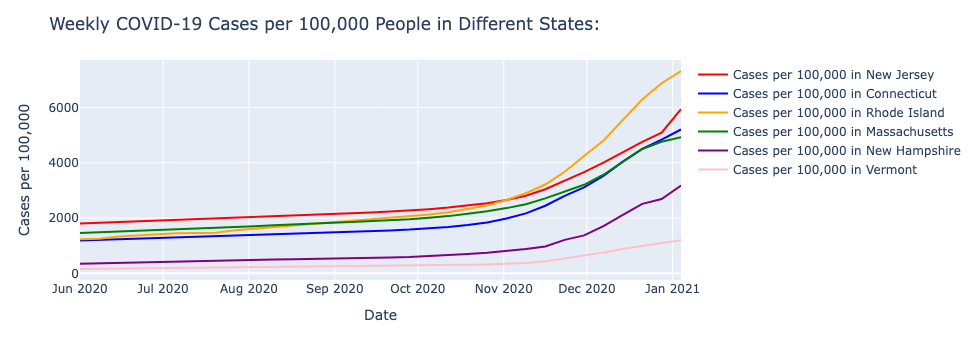

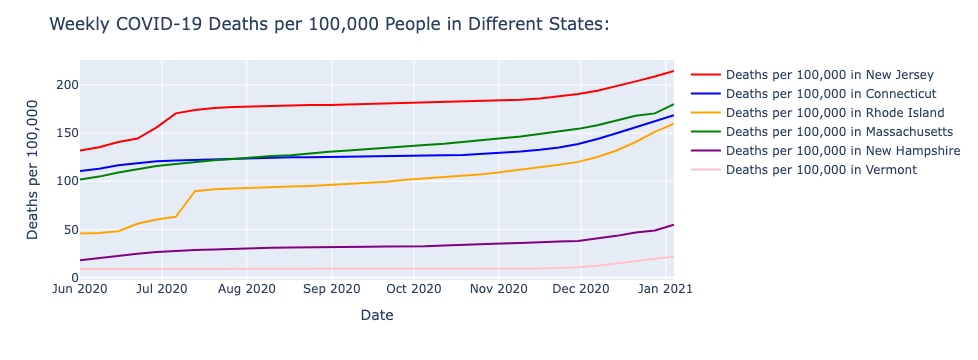

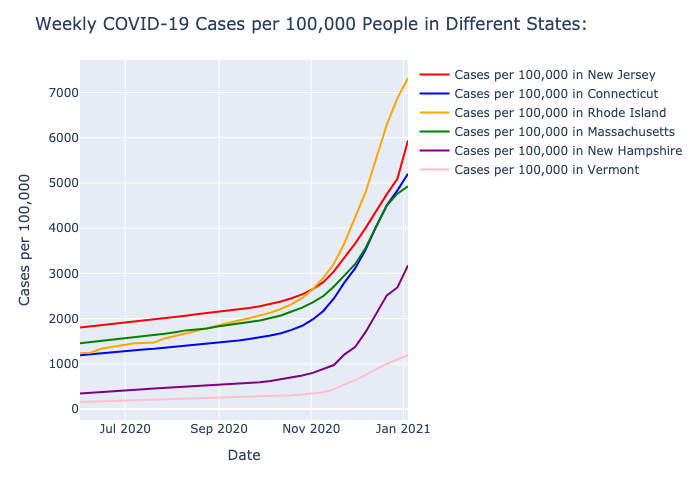

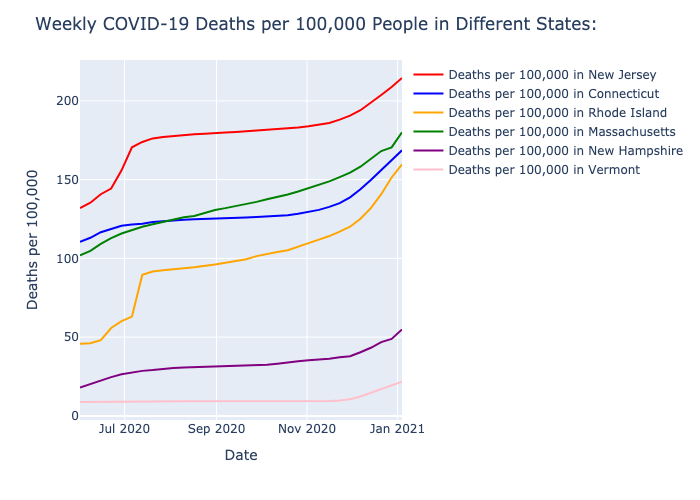

In [31]:
import plotly.express as px

# line plot for weekly cases and deaths per 100,000 people in New Jersey, Connecticut, Rhode Island, Massachusetts, New Hampshire, and Vermont:

# initializing plot for cases
fig_states = px.line()

# initialzing plot for deaths
fig2_states = px.line()

# adding case data for New Jersey
fig_states.add_scatter(
        x = weekly_nj_cases.reset_index()['date'],
        y = weekly_nj_cases.reset_index()['per_100k'],
        mode = 'lines',
        name = 'Cases per 100,000 in New Jersey',
        line = dict(color = 'red'))  
# adding death data for New Jersey
fig2_states.add_scatter(
        x = weekly_nj_deaths.reset_index()['date'],
        y = weekly_nj_deaths['per_100k'],
        mode = 'lines',
        name = 'Deaths per 100,000 in New Jersey',
        line = dict(color = 'red'))   

# adding case data for Connecticut
fig_states.add_scatter(
        x = weekly_ct_cases.reset_index()['date'],
        y = weekly_ct_cases.reset_index()['per_100k'],
        mode = 'lines',
        name = 'Cases per 100,000 in Connecticut',
        line = dict(color = 'blue'))  
# adding death data for Connecticut
fig2_states.add_scatter(
        x = weekly_ct_deaths.reset_index()['date'],
        y = weekly_ct_deaths['per_100k'],
        mode = 'lines',
        name = 'Deaths per 100,000 in Connecticut',
        line = dict(color = 'blue'))  

# adding case data for Rhode Island
fig_states.add_scatter(
        x = weekly_ri_cases.reset_index()['date'],
        y = weekly_ri_cases.reset_index()['per_100k'],
        mode = 'lines',
        name = 'Cases per 100,000 in Rhode Island',
        line = dict(color = 'orange'))  
# adding death data for Rhode Island
fig2_states.add_scatter(
        x = weekly_ri_deaths.reset_index()['date'],
        y = weekly_ri_deaths['per_100k'],
        mode = 'lines',
        name = 'Deaths per 100,000 in Rhode Island',
        line = dict(color = 'orange'))  

# adding case data for Massachusetts
fig_states.add_scatter(
        x = weekly_ma_cases.reset_index()['date'],
        y = weekly_ma_cases.reset_index()['per_100k'],
        mode = 'lines',
        name = 'Cases per 100,000 in Massachusetts',
        line = dict(color = 'green'))  
# adding death data for Massachusetts
fig2_states.add_scatter(
        x = weekly_ma_deaths.reset_index()['date'],
        y = weekly_ma_deaths['per_100k'],
        mode = 'lines',
        name = 'Deaths per 100,000 in Massachusetts',
        line = dict(color = 'green'))  

# adding case data for New Hampshire
fig_states.add_scatter(
        x = weekly_nh_cases.reset_index()['date'],
        y = weekly_nh_cases.reset_index()['per_100k'],
        mode = 'lines',
        name = 'Cases per 100,000 in New Hampshire',
        line = dict(color = 'purple'))  
# adding death data for New Hampshire
fig2_states.add_scatter(
        x = weekly_nh_deaths.reset_index()['date'],
        y = weekly_nh_deaths['per_100k'],
        mode = 'lines',
        name = 'Deaths per 100,000 in New Hampshire',
        line = dict(color = 'purple'))  

# adding case data for Vermont
fig_states.add_scatter(
        x = weekly_vt_cases.reset_index()['date'],
        y = weekly_vt_cases.reset_index()['per_100k'],
        mode = 'lines',
        name = 'Cases per 100,000 in Vermont',
        line = dict(color = 'pink'))  
# adding death data for Vermont
fig2_states.add_scatter(
        x = weekly_vt_deaths.reset_index()['date'],
        y = weekly_vt_deaths['per_100k'],
        mode = 'lines',
        name = 'Deaths per 100,000 in Vermont',
        line = dict(color = 'pink'))  

# updating figure data
fig_states.update_layout(
        title = 'Weekly COVID-19 Cases per 100,000 People in Different States:',
        xaxis_title = 'Date',
        yaxis_title = 'Cases per 100,000',)

fig2_states.update_layout(
        title = 'Weekly COVID-19 Deaths per 100,000 People in Different States:',
        xaxis_title = 'Date',
        yaxis_title = 'Deaths per 100,000',)
                   
# Display and save the first figure
fig_states.show()
pio.write_image(fig_states, 'fig_states.png')

# Display and save the second figure
fig2_states.show()
pio.write_image(fig2_states, 'fig2_states.png')

# Display both images
from IPython.display import Image, display

display(Image('fig_states.png'))  # display first image
display(Image('fig2_states.png')) # display second image

As we can see from the two line graphs, cases and deaths, each state follows a similar trend. But, while each line looks similar, there are some inconsistencies between the different states.

The difference in rates could be due to a number of factors, including:
* Inconsistences in reporting methods
* Delayed reporting in different states
* Population differences
* Population densities in different states

All factors considered, the states trends of cases and deaths are very similar to one another. There is a relative trend between the states, with a slight increase in June of 2020, and a dramatic increase in January of 2021. This data also correlates with the pattern of the United States, which experienced the same trends across the entirety of the country.

There is a peak shared in July of 2020 by both Rhode Island and New Jersey. This could be contributed to by summer tourism. Rhode Island and New Jersey are popular for tourist destinations, with both known for their costal towns. A contributing factor to the large jump in cases and deaths from Rhode Island specifically, was the re-opening of the state for tourism in late June.
###### source: https://planning.ri.gov/sites/g/files/xkgbur826/files/documents/newsletter/2020/JulyAugust-2020.pdf

### Identifying five counties within New Jersey with the highest case and death rates:

In [33]:
# use the end_date to figure out the highest cases and death rates at the end of the selected dates (2020-06-01 - 2021-01-03)
cases_on_date = data_nj_cases[data_nj_cases['date'] == end_date]
deaths_on_date = data_nj_deaths[data_nj_deaths['date'] == end_date]

# group by county and get the highest case and death rate
highest_case_rates = cases_on_date.sort_values(by='cases', ascending=False).drop_duplicates(subset=['County Name'])
highest_death_rates = deaths_on_date.sort_values(by='deaths', ascending=False).drop_duplicates(subset=['County Name'])

# using weekly cases to identify top five counties based on case and death rate
top_case_counties = highest_case_rates.nlargest(5, 'cases')[['County Name', 'cases']]
# using weekly deaths to identify top five counties based on death rate
top_death_counties = highest_death_rates.nlargest(5, 'deaths')[['County Name', 'deaths']]

# print counties
print(top_case_counties)
print(top_death_counties)

            County Name  cases
4537     Bergen County   52966
4542      Essex County   52140
4547  Middlesex County   49161
4544     Hudson County   48633
4551    Passaic County   43588
            County Name  deaths
4542      Essex County     2403
4537     Bergen County     2335
4544     Hudson County     1713
4547  Middlesex County     1688
4555      Union County     1561


### Plotting weekly trends for top five infected counties:
#### With the 5 counties identified, we will now plot the weekly trends for each county by cases and deaths:

In [37]:
# calculate case & death rates per 100,000 people in each county
data_nj_cases.loc[:,'Case_Rate'] = (data_nj_cases['cases'] / data_nj_cases['population']) * 100000
data_nj_deaths.loc[:,'Death_Rate'] = (data_nj_deaths['deaths'] / data_nj_deaths['population']) * 100000

# Bergen County cases from New Jersey Data
nj_cases_bergen = data_nj_cases[data_nj_cases['County Name'] == 'Bergen County ']
# Essex County cases from New Jersey Data
nj_cases_essex = data_nj_cases[data_nj_cases['County Name'] == 'Essex County ']
# Middlesex County cases from New Jersey Data
nj_cases_middlesex = data_nj_cases[data_nj_cases['County Name'] == 'Middlesex County ']
# Hudson County cases from New Jersey Data
nj_cases_hudson = data_nj_cases[data_nj_cases['County Name'] == 'Hudson County ']
# Passaic County cases from New Jersey Data
nj_cases_passaic = data_nj_cases[data_nj_cases['County Name'] == 'Passaic County ']

# Essex County deaths from New Jersey Data
nj_deaths_essex = data_nj_deaths[data_nj_deaths['County Name'] == 'Essex County ']
# Bergen County deaths from New Jersey Data
nj_deaths_bergen = data_nj_deaths[data_nj_deaths['County Name'] == 'Bergen County ']
# Hudson County deaths from New Jersey Data
nj_deaths_hudson = data_nj_deaths[data_nj_deaths['County Name'] == 'Hudson County ']
# Middlesex County deaths from New Jersey Data
nj_deaths_middlesex = data_nj_deaths[data_nj_deaths['County Name'] == 'Middlesex County ']
# Union County deaths from New Jersey Data
nj_deaths_union = data_nj_deaths[data_nj_deaths['County Name'] == 'Union County ']

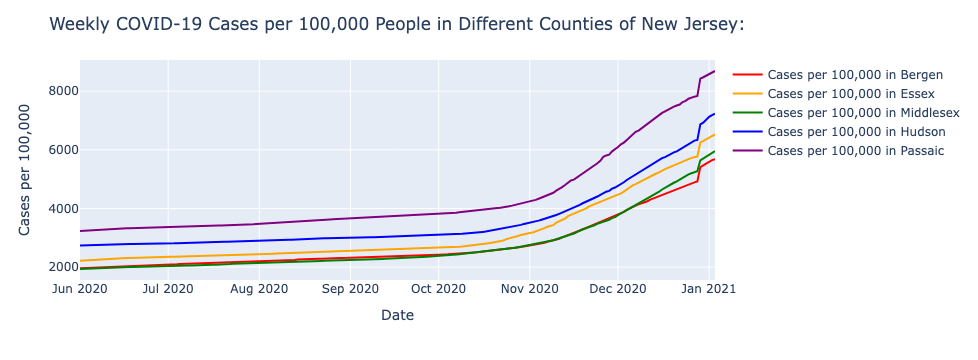

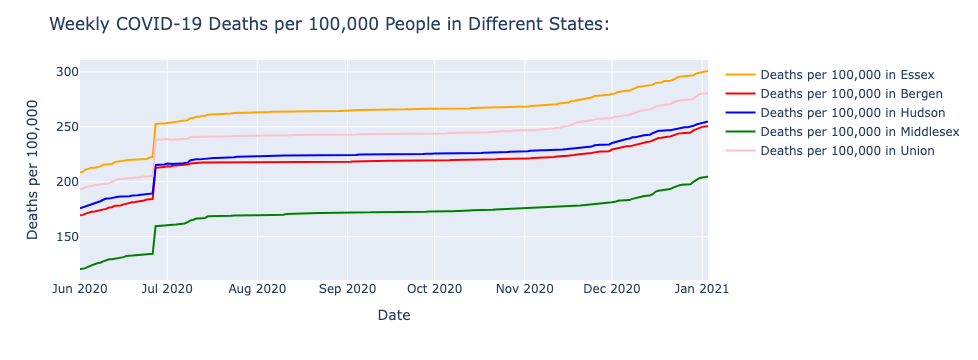

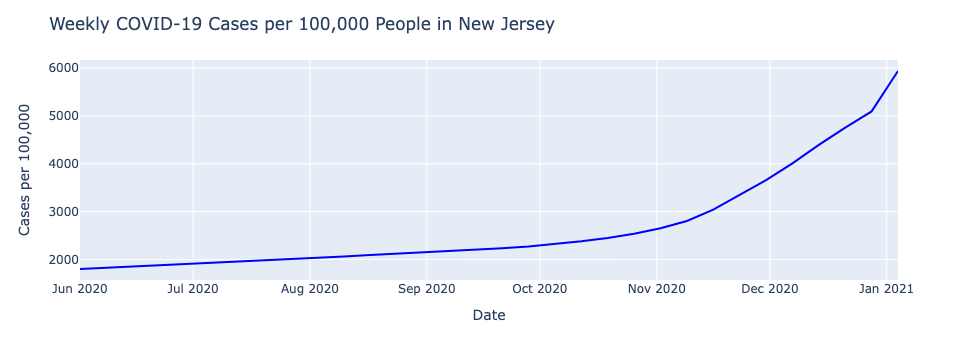

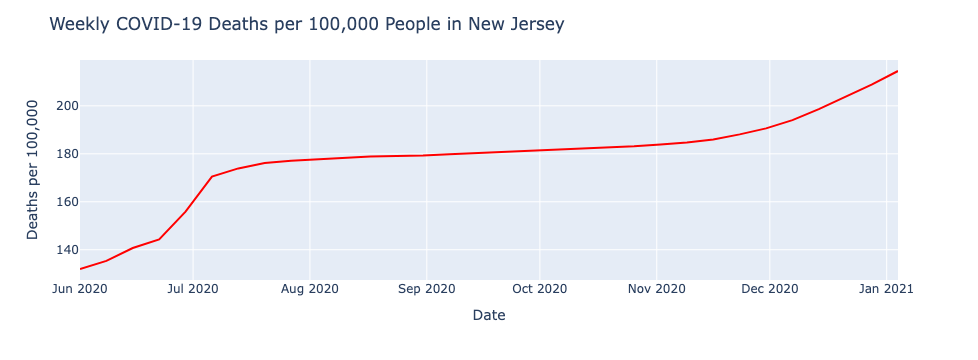

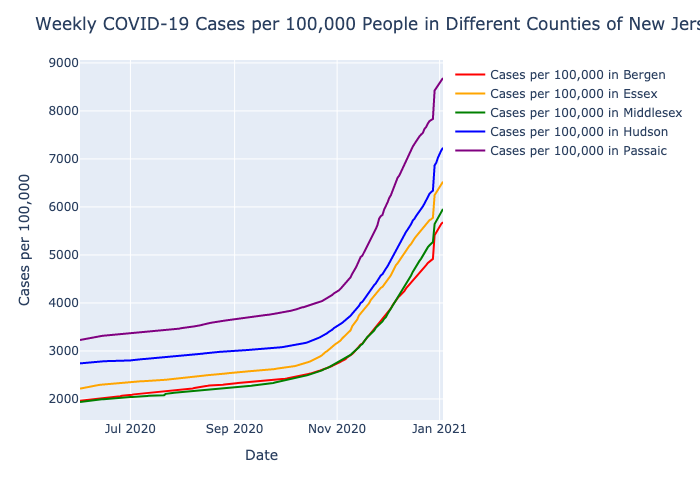

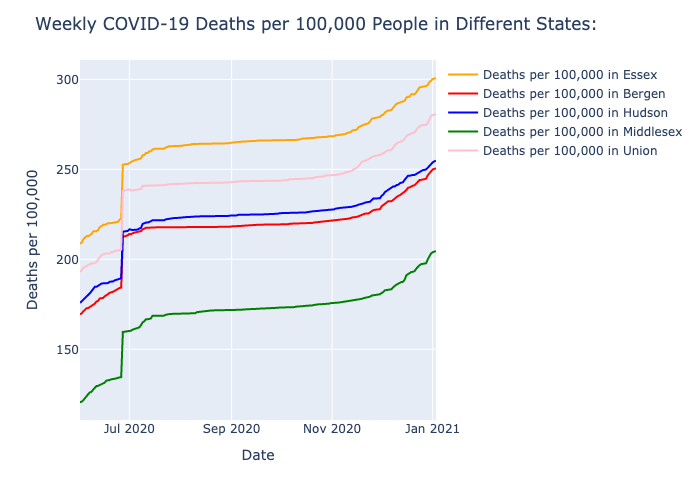

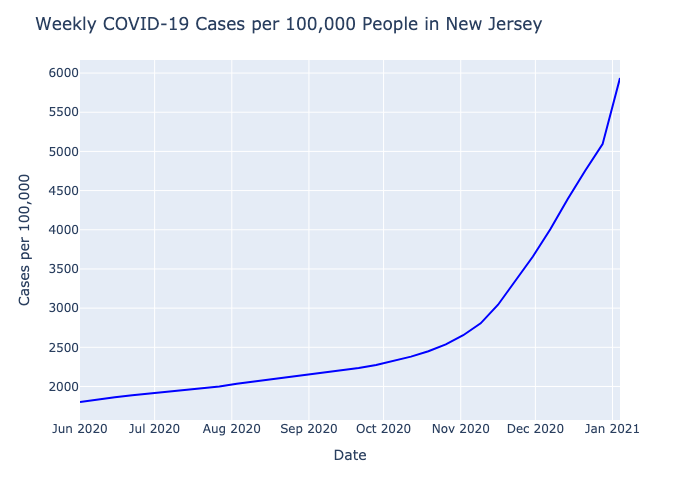

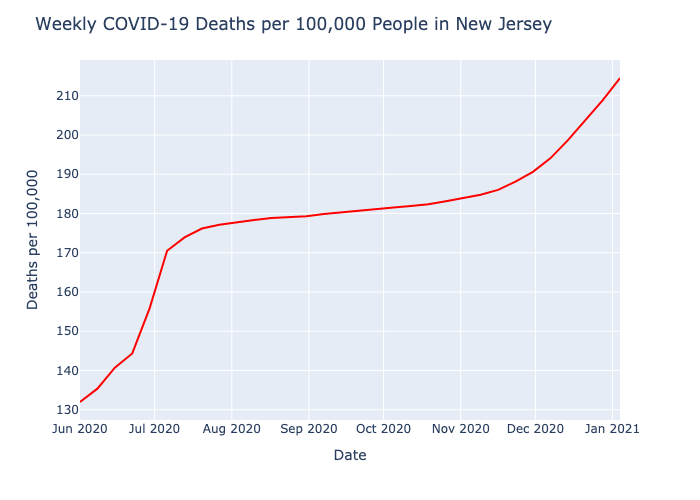

In [39]:
# line plot for weekly cases and deaths per 100,000 people in New Jersey, Connecticut, Rhode Island, Massachusetts, New Hampshire, and Vermont:

# initializing plot for cases
fig_counties = px.line()

# initialzing plot for deaths
fig2_counties = px.line()

# adding case data for New Jersey counties:

fig_counties.add_scatter(
        x = nj_cases_bergen.reset_index()['date'],
        y = nj_cases_bergen.reset_index()['Case_Rate'],
        mode = 'lines',
        name = 'Cases per 100,000 in Bergen',
        line = dict(color = 'red'))
fig_counties.add_scatter(
        x = nj_cases_essex.reset_index()['date'],
        y = nj_cases_essex.reset_index()['Case_Rate'],
        mode = 'lines',
        name = 'Cases per 100,000 in Essex',
        line = dict(color = 'orange'))
fig_counties.add_scatter(
        x = nj_cases_middlesex.reset_index()['date'],
        y = nj_cases_middlesex.reset_index()['Case_Rate'],
        mode = 'lines',
        name = 'Cases per 100,000 in Middlesex',
        line = dict(color = 'green'))
fig_counties.add_scatter(
        x = nj_cases_hudson.reset_index()['date'],
        y = nj_cases_hudson.reset_index()['Case_Rate'],
        mode = 'lines',
        name = 'Cases per 100,000 in Hudson',
        line = dict(color = 'blue'))
fig_counties.add_scatter(
        x = nj_cases_passaic.reset_index()['date'],
        y = nj_cases_passaic.reset_index()['Case_Rate'],
        mode = 'lines',
        name = 'Cases per 100,000 in Passaic',
        line = dict(color = 'purple'))

# adding death data for New Jersey counties:

fig2_counties.add_scatter(
        x = nj_deaths_essex.reset_index()['date'],
        y = nj_deaths_essex['Death_Rate'],
        mode = 'lines',
        name = 'Deaths per 100,000 in Essex',
        line = dict(color = 'orange'))   
fig2_counties.add_scatter(
        x = nj_deaths_bergen.reset_index()['date'],
        y = nj_deaths_bergen['Death_Rate'],
        mode = 'lines',
        name = 'Deaths per 100,000 in Bergen',
        line = dict(color = 'red'))  
fig2_counties.add_scatter(
        x = nj_deaths_hudson.reset_index()['date'],
        y = nj_deaths_hudson['Death_Rate'],
        mode = 'lines',
        name = 'Deaths per 100,000 in Hudson',
        line = dict(color = 'blue'))  
fig2_counties.add_scatter(
        x = nj_deaths_middlesex.reset_index()['date'],
        y = nj_deaths_middlesex['Death_Rate'],
        mode = 'lines',
        name = 'Deaths per 100,000 in Middlesex',
        line = dict(color = 'green'))  
fig2_counties.add_scatter(
        x = nj_deaths_union.reset_index()['date'],
        y = nj_deaths_union['Death_Rate'],
        mode = 'lines',
        name = 'Deaths per 100,000 in Union',
        line = dict(color = 'pink'))  

# updating figure data for cases
fig_counties.update_layout(
        title = 'Weekly COVID-19 Cases per 100,000 People in Different Counties of New Jersey:',
        xaxis_title = 'Date',
        yaxis_title = 'Cases per 100,000',)

# updating figure data for deaths
fig2_counties.update_layout(
        title = 'Weekly COVID-19 Deaths per 100,000 People in Different States:',
        xaxis_title = 'Date',
        yaxis_title = 'Deaths per 100,000',)

# displaying New Jersey County Data
fig_counties.show()
pio.write_image(fig_counties, 'fig_counties.png')
fig2_counties.show()
pio.write_image(fig2_counties, 'fig2_counties.png')

# re-displaying New Jersey State Data
fig_nj.show()
pio.write_image(fig_nj, 'fig_nj.png')
fig2_nj.show()
pio.write_image(fig2_nj, 'fig2_nj.png')

# Display both images
from IPython.display import Image, display

display(Image('fig_counties.png'))  # display first image
display(Image('fig2_counties.png')) # display second image
display(Image('fig_nj.png')) # display second image
display(Image('fig2_nj.png')) # display second image

As we can see within the weekly trends of the counties with the highest case and death rate in New Jersey, the plots for both the counties and the state itself have a very strong correlation.

Both plots have a sudden increase at the end of June 2020. This could likely be because of a delay in reporting the death toll for COVID-19. At that point in the year, COVID-19 was still a new and unknown disease, which could have led to delays in reporting.

Looking at both graphs, it is obvious that there is an increased trend nearing the end of the time slot of this data displayed. In January of 2021, both the state and counties datasets dramatically increase, likely due to travel for Christmas and New Years. Since it had almost been a year since the start of COVID-19, many people could have been lured into a sense of false sense that the cases of COVID-19 had stopped spreading, when it was simply due to a large percentage of the population remaining inside.